In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import * 

import scipy.stats as spst
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

from itertools import product
import pickle

In [42]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

In [43]:
def plot_model_result(y_train, y_val, pred) :
    pred = pd.Series(pred, index = y_val.index)

    # 전체 시각화
    plt.figure(figsize = (20,12))
    plt.subplot(3,1,1)
    plt.plot(y_train, label = 'train')
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()

    plt.subplot(3,1,2)
    plt.plot(y_val, label = 'val')
    plt.plot(pred, label = 'pred')
    plt.legend()
    plt.grid()
    
    
    plt.subplot(3,1,3)
    plt.plot(y_val[:500], label = 'val')
    plt.plot(pred[:500], label = 'pred')
    plt.legend()
    plt.grid()

    plt.show()

In [4]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

## 데이터 불러오기

In [67]:
x = pd.read_csv('x_train.csv')
y = pd.Series(pd.read_csv('y_train.csv')['y'])

In [68]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, shuffle=False)

In [69]:
x_train.shape, x_val.shape

((12280, 34), (5264, 34))

In [70]:
y_train.shape, y_val.shape

((12280,), (5264,))

In [71]:
x_train

,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),서울 일사(MJ/m2),서울 적설(cm),서울 시정(10m),서울 지면온도(°C),부산 기온(°C),부산 강수량(mm),부산 풍속(m/s),부산 풍향(16방위),부산 습도(%),부산 증기압(hPa),부산 이슬점온도(°C),부산 현지기압(hPa),부산 해면기압(hPa),부산 일조(hr),부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,year,month,time,weekend_1,holiday_1,Korean_holiday_1
0,-6.5,0.0,0.0,0.0,38.0,1.4,-18.5,1022.6,1033.8,0.0,0.00,0.0,2000.0,-2.8,-2.5,0.0,1.7,16.0,23.0,1.2,-20.8,1021.7,1030.7,0.0,0.00,2000.0,-1.4,265,2020,1,0,0,1,0
1,-5.9,0.0,1.7,2.0,40.0,1.6,-17.3,1021.8,1033.0,0.0,0.00,0.0,2000.0,-2.4,-2.9,0.0,2.0,15.0,22.0,1.1,-21.7,1021.6,1030.6,0.0,0.00,2000.0,-1.6,265,2020,1,1,0,1,0
2,-5.7,0.0,0.1,0.0,42.0,1.7,-16.5,1021.6,1032.8,0.0,0.00,0.0,1988.0,-2.4,-3.1,0.0,1.9,6.0,23.0,1.1,-21.3,1021.6,1030.6,0.0,0.00,2000.0,-1.9,291,2020,1,2,0,1,0
3,-5.6,0.0,0.0,0.0,46.0,1.8,-15.4,1021.5,1032.7,0.0,0.00,0.0,2000.0,-2.7,-2.8,0.0,4.5,1.0,24.0,1.2,-20.6,1021.1,1030.1,0.0,0.00,2000.0,-2.0,284,2020,1,3,0,1,0
4,-5.4,0.0,0.0,0.0,50.0,2.0,-14.2,1021.6,1032.8,0.0,0.00,0.0,1908.0,-2.5,-3.1,0.0,1.9,5.0,35.0,1.7,-16.4,1021.0,1030.0,0.0,0.00,2000.0,-2.1,363,2020,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,20.5,0.0,2.9,7.0,47.0,11.2,8.7,998.4,1008.3,1.0,3.01,0.0,2000.0,29.5,21.6,0.0,3.1,8.0,30.0,7.7,3.2,1002.8,1010.8,1.0,2.93,5000.0,40.0,239,2021,5,11,0,0,0
12276,21.4,0.0,3.5,8.0,42.0,10.6,7.9,997.9,1007.7,0.5,2.29,0.0,2000.0,27.0,20.2,0.0,4.3,8.0,37.0,8.7,5.0,1002.5,1010.6,0.7,3.12,5000.0,37.0,258,2021,5,12,0,0,0
12277,22.1,0.0,3.2,9.0,38.0,10.1,7.1,997.2,1007.0,0.4,2.16,0.0,2000.0,25.0,19.9,0.0,4.5,8.0,55.0,12.7,10.5,1002.0,1010.1,0.1,2.25,5000.0,34.2,287,2021,5,13,0,0,0
12278,22.7,0.0,4.2,9.0,35.0,9.6,6.4,996.3,1006.1,0.0,1.49,0.0,2000.0,24.2,19.1,0.0,4.7,8.0,60.0,13.2,11.1,1001.5,1009.5,0.0,1.30,4652.0,29.5,240,2021,5,14,0,0,0


In [72]:
y_train

0        265
1        291
2        284
3        363
4        288
        ... 
12275    258
12276    287
12277    240
12278    253
12279    265
Name: y, Length: 12280, dtype: int64

## 모델링

1. Linear Regreesion

In [73]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [74]:
pred_lr = model_lr.predict(x_val)

print('R2 Score', r2_score(y_val, pred_lr))
print('RMSE', mean_squared_error(y_val, pred_lr, squared=False))
print('MAE', mean_absolute_error(y_val, pred_lr))
print('MAPE', mean_absolute_percentage_error(y_val, pred_lr))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_lr))

R2 Score 0.1898229126542862
RMSE 27.68602734234505
MAE 16.82152099611242
MAPE 0.06100156809448282
1-MAPE 0.9389984319055171


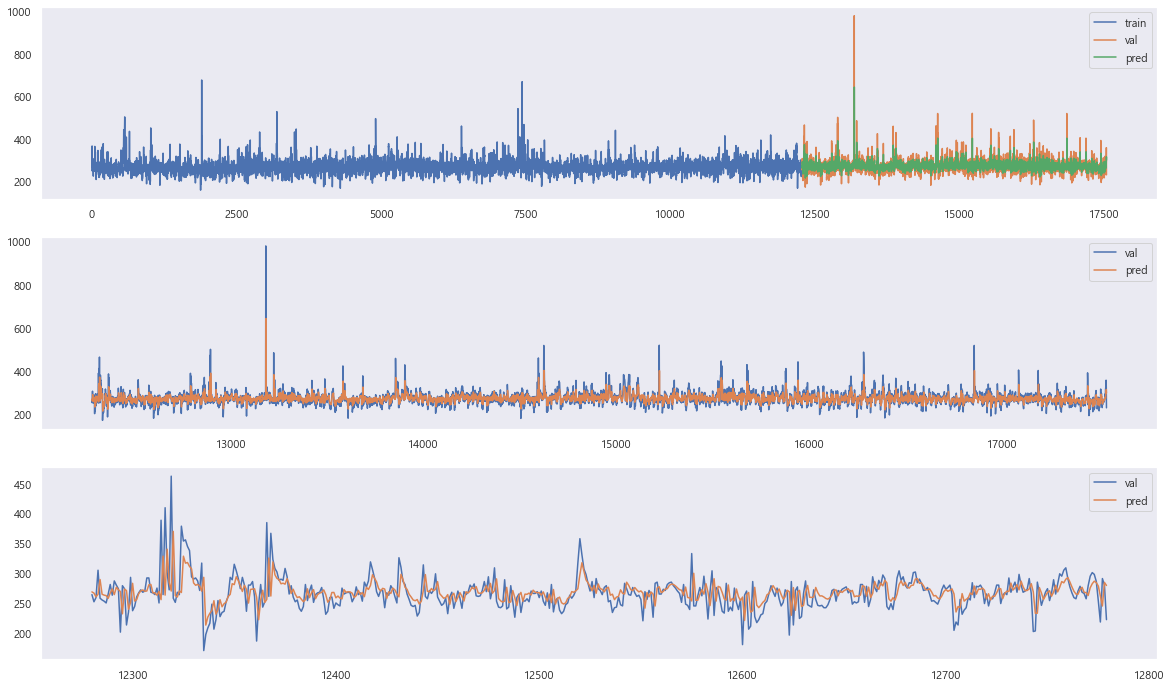

In [75]:
plot_model_result(y_train, y_val, pred_lr)

In [76]:
with open("model_lr.pkl", "wb") as file:
        pickle.dump(model_lr, file)

In [7]:
with open("model_lr.pkl", "rb") as file:
        model_lr = pickle.load(file)

2. Random Forest

In [77]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
pred_rf = model_rf.predict(x_val)

print('R2 Score', r2_score(y_val, pred_rf))
print('RMSE', mean_squared_error(y_val, pred_rf, squared=False))
print('MAE', mean_absolute_error(y_val, pred_rf))
print('MAPE', mean_absolute_percentage_error(y_val, pred_rf))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_rf))

R2 Score 0.20221383245005276
RMSE 27.473495318975946
MAE 16.961130319148936
MAPE 0.061333565911751826
1-MAPE 0.9386664340882481


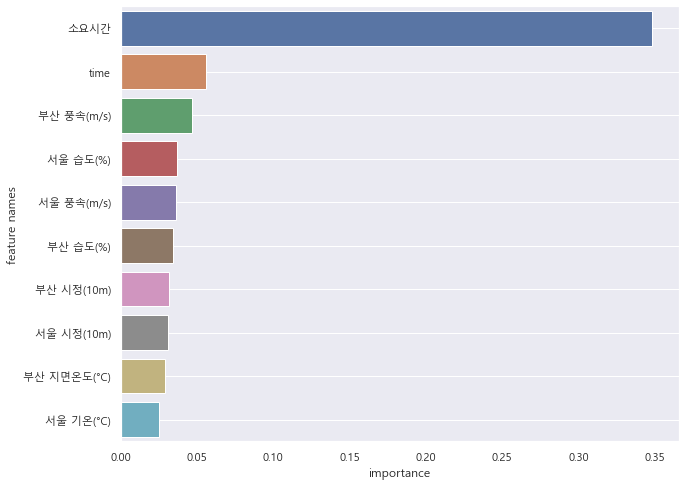

In [79]:
result = plot_feature_importance(model_rf.feature_importances_, list(x), 10)

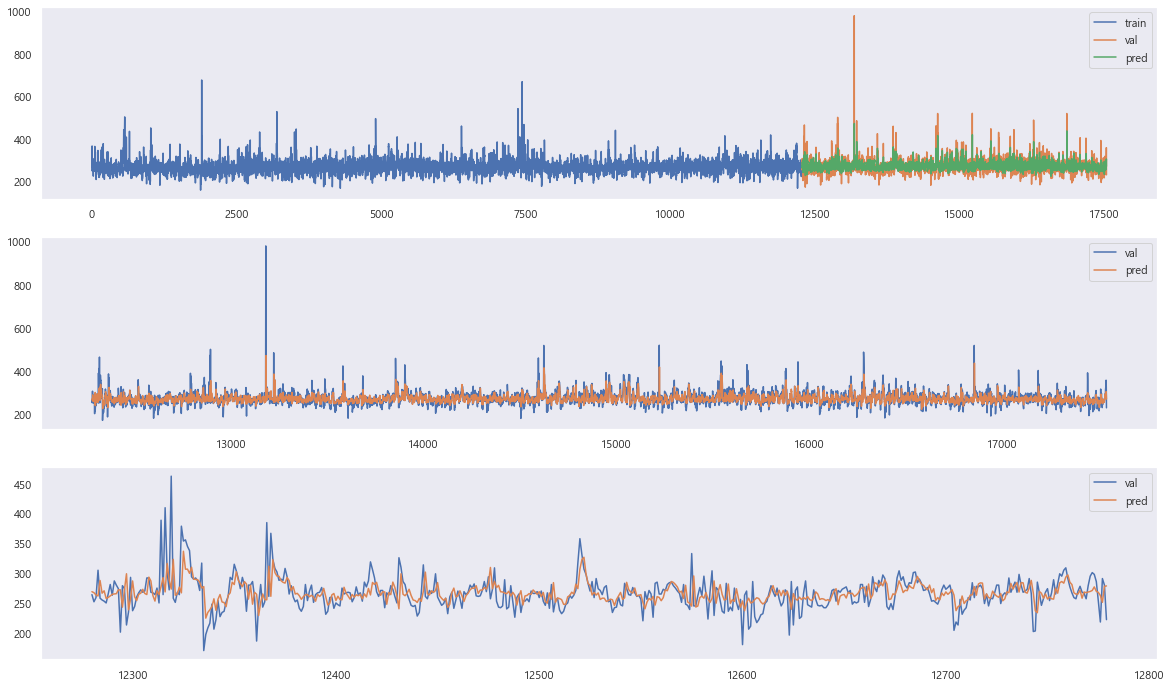

In [80]:
plot_model_result(y_train, y_val, pred_rf)

In [81]:
with open("model_rf.pkl", "wb") as file:
        pickle.dump(model_rf, file)

In [9]:
with open("model_rf.pkl", "rb") as file:
        model_rf = pickle.load(file)

3. XGB

In [82]:
model_xgb = XGBRegressor()

params = {'learning_rate':np.linspace(0.01, 0.3, 10), 'max_depth':range(2, 20, 2)}
model_xgb_gs = GridSearchCV(model_xgb, params, cv=5, verbose=3, scoring='neg_mean_absolute_error')
model_xgb_gs.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .learning_rate=0.01, max_depth=2;, score=-92.927 total time=   0.4s
[CV 2/5] END .learning_rate=0.01, max_depth=2;, score=-96.057 total time=   0.2s
[CV 3/5] END .learning_rate=0.01, max_depth=2;, score=-99.427 total time=   0.3s
[CV 4/5] END .learning_rate=0.01, max_depth=2;, score=-95.546 total time=   0.4s
[CV 5/5] END .learning_rate=0.01, max_depth=2;, score=-98.702 total time=   0.2s
[CV 1/5] END .learning_rate=0.01, max_depth=4;, score=-93.328 total time=   0.4s
[CV 2/5] END .learning_rate=0.01, max_depth=4;, score=-96.088 total time=   0.4s
[CV 3/5] END .learning_rate=0.01, max_depth=4;, score=-99.262 total time=   0.4s
[CV 4/5] END .learning_rate=0.01, max_depth=4;, score=-95.882 total time=   0.4s
[CV 5/5] END .learning_rate=0.01, max_depth=4;, score=-98.732 total time=   0.4s
[CV 1/5] END .learning_rate=0.01, max_depth=6;, score=-93.333 total time=   0.5s
[CV 2/5] END .learning_rate=0.01, max_depth=6;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                         'max_depth': range(2, 20, 2)},
             scoring='neg_mean_absolute_error', verbose=3)

In [83]:
model_xgb_gs.best_params_, model_xgb_gs.best_score_

({'learning_rate': 0.07444444444444444, 'max_depth': 2}, -16.17304803680519)

In [84]:
pred_xgb = model_xgb_gs.predict(x_val)

print('R2 Score', r2_score(y_val, pred_xgb))
print('RMSE', mean_squared_error(y_val, pred_xgb, squared=False))
print('MAE', mean_absolute_error(y_val, pred_xgb))
print('MAPE', mean_absolute_percentage_error(y_val, pred_xgb))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_xgb))

R2 Score 0.22322684881554755
RMSE 27.109266570326515
MAE 16.476120328468394
MAPE 0.05929024309916991
1-MAPE 0.9407097569008301


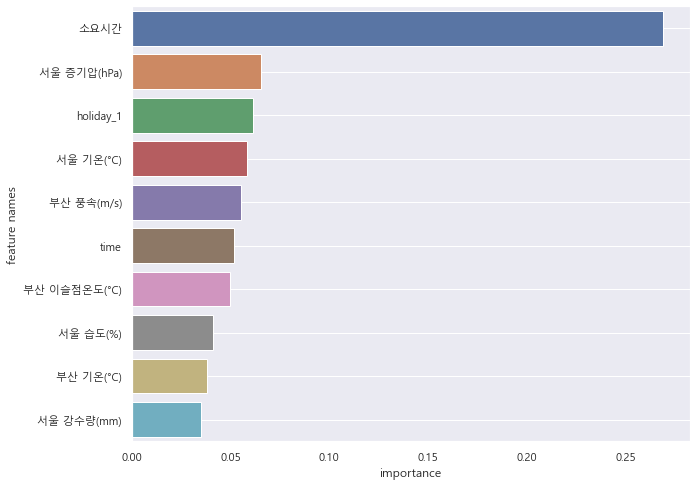

In [85]:
result = plot_feature_importance(model_xgb_gs.best_estimator_.feature_importances_, list(x), 10)

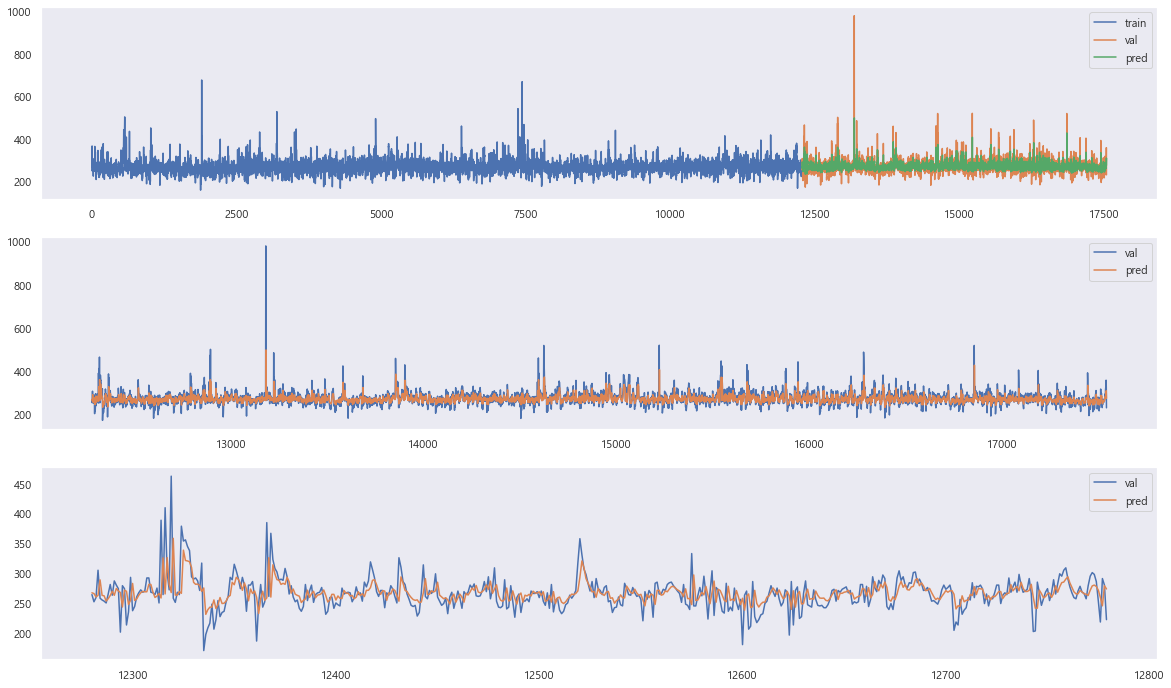

In [86]:
plot_model_result(y_train, y_val, pred_xgb)

In [87]:
with open("model_xgb.pkl", "wb") as file:
        pickle.dump(model_xgb_gs, file)

In [11]:
with open("model_xgb.pkl", "rb") as file:
        model_xgb_gs = pickle.load(file)

4. Gradient Boosting

In [88]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [89]:
pred_gb = model_gb.predict(x_val)

print('R2 Score', r2_score(y_val, pred_gb))
print('RMSE', mean_squared_error(y_val, pred_gb, squared=False))
print('MAE', mean_absolute_error(y_val, pred_gb))
print('MAPE', mean_absolute_percentage_error(y_val, pred_gb))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_gb))

R2 Score 0.22059754822440325
RMSE 27.15510890845311
MAE 16.411984183473546
MAPE 0.05924530888658596
1-MAPE 0.940754691113414


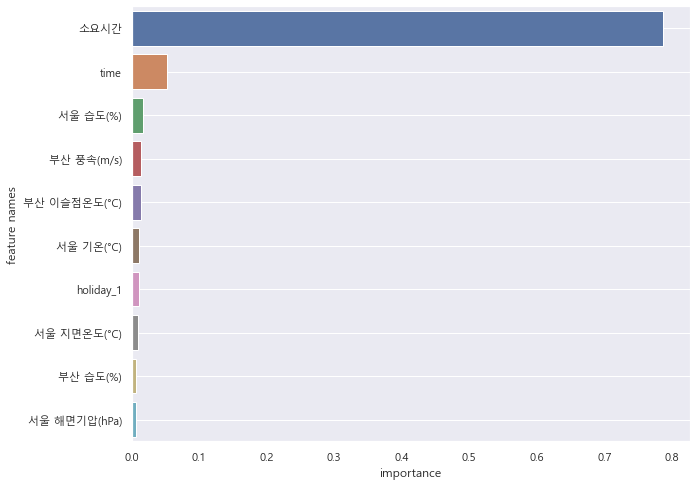

In [90]:
result = plot_feature_importance(model_gb.feature_importances_, list(x), 10)

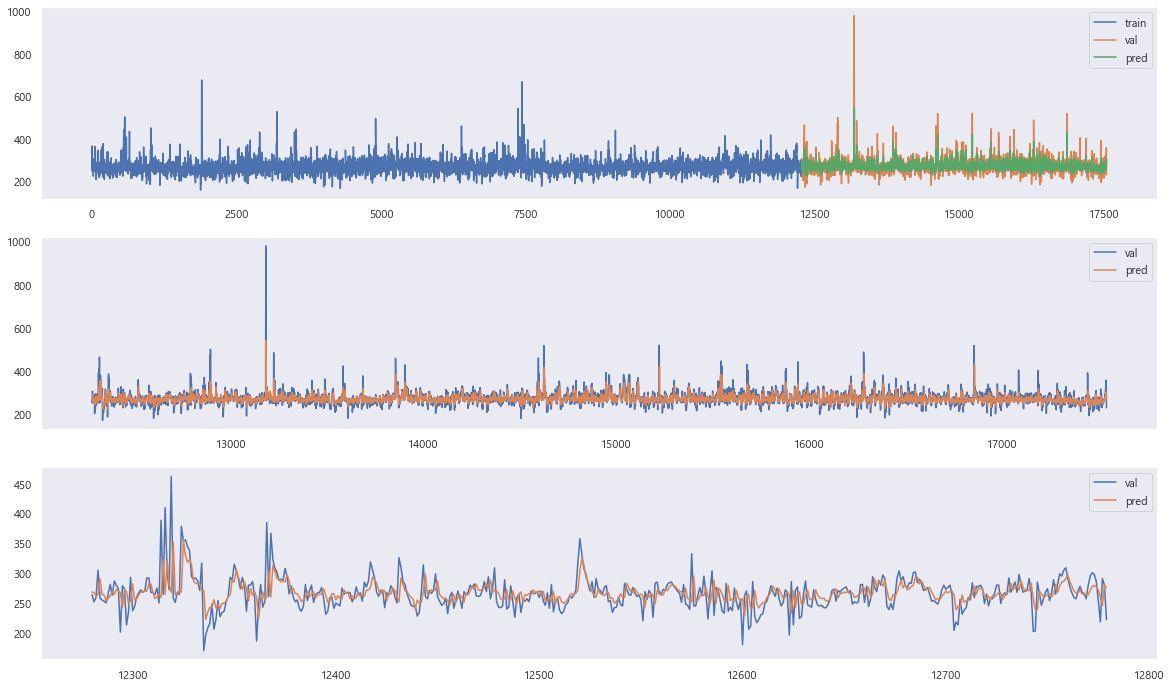

In [91]:
plot_model_result(y_train, y_val, pred_gb)

In [92]:
with open("model_gb.pkl", "wb") as file:
        pickle.dump(model_gb, file)

In [ ]:
with open("model_gb.pkl", "rb") as file:
        model_gb = pickle.load(file)

5. LGBM

In [93]:
model_lgbm = LGBMRegressor()

params = {'learning_rate':np.linspace(0.01, 0.3, 10), 'max_depth':range(2, 20, 2)}
model_lgbm_gs = GridSearchCV(model_lgbm, params, cv=5, verbose=3, scoring='neg_mean_absolute_error')
model_lgbm_gs.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END .learning_rate=0.01, max_depth=2;, score=-18.570 total time=   0.0s
[CV 2/5] END .learning_rate=0.01, max_depth=2;, score=-18.098 total time=   0.0s
[CV 3/5] END .learning_rate=0.01, max_depth=2;, score=-17.089 total time=   0.0s
[CV 4/5] END .learning_rate=0.01, max_depth=2;, score=-15.411 total time=   0.0s
[CV 5/5] END .learning_rate=0.01, max_depth=2;, score=-17.118 total time=   0.0s
[CV 1/5] END .learning_rate=0.01, max_depth=4;, score=-18.355 total time=   0.0s
[CV 2/5] END .learning_rate=0.01, max_depth=4;, score=-17.855 total time=   0.0s
[CV 3/5] END .learning_rate=0.01, max_depth=4;, score=-16.606 total time=   0.0s
[CV 4/5] END .learning_rate=0.01, max_depth=4;, score=-15.086 total time=   0.1s
[CV 5/5] END .learning_rate=0.01, max_depth=4;, score=-16.756 total time=   0.2s
[CV 1/5] END .learning_rate=0.01, max_depth=6;, score=-18.371 total time=   0.3s
[CV 2/5] END .learning_rate=0.01, max_depth=6;,

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                         'max_depth': range(2, 20, 2)},
             scoring='neg_mean_absolute_error', verbose=3)

In [94]:
model_lgbm_gs.best_params_, model_lgbm_gs.best_score_

({'learning_rate': 0.042222222222222223, 'max_depth': 4}, -16.006458970052375)

In [95]:
pred_lgbm = model_lgbm_gs.predict(x_val)

print('R2 Score', r2_score(y_val, pred_lgbm))
print('RMSE', mean_squared_error(y_val, pred_lgbm, squared=False))
print('MAE', mean_absolute_error(y_val, pred_lgbm))
print('MAPE', mean_absolute_percentage_error(y_val, pred_lgbm))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_lgbm))

R2 Score 0.24037518992934115
RMSE 26.808359298451297
MAE 16.28078916017683
MAPE 0.0586968827673639
1-MAPE 0.941303117232636


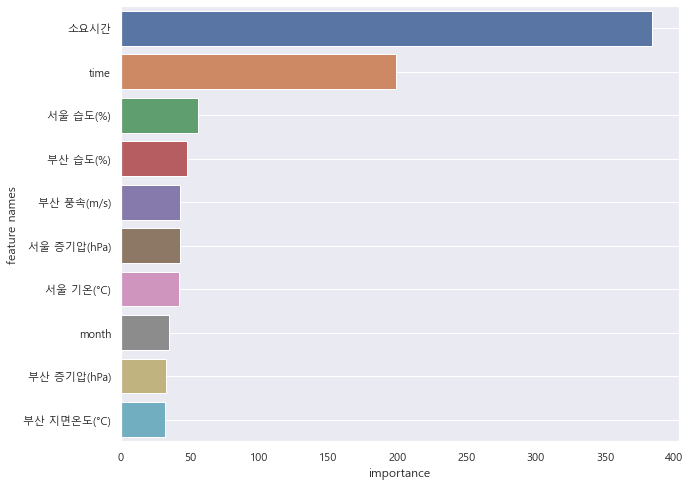

In [96]:
result = plot_feature_importance(model_lgbm_gs.best_estimator_.feature_importances_, list(x), 10)

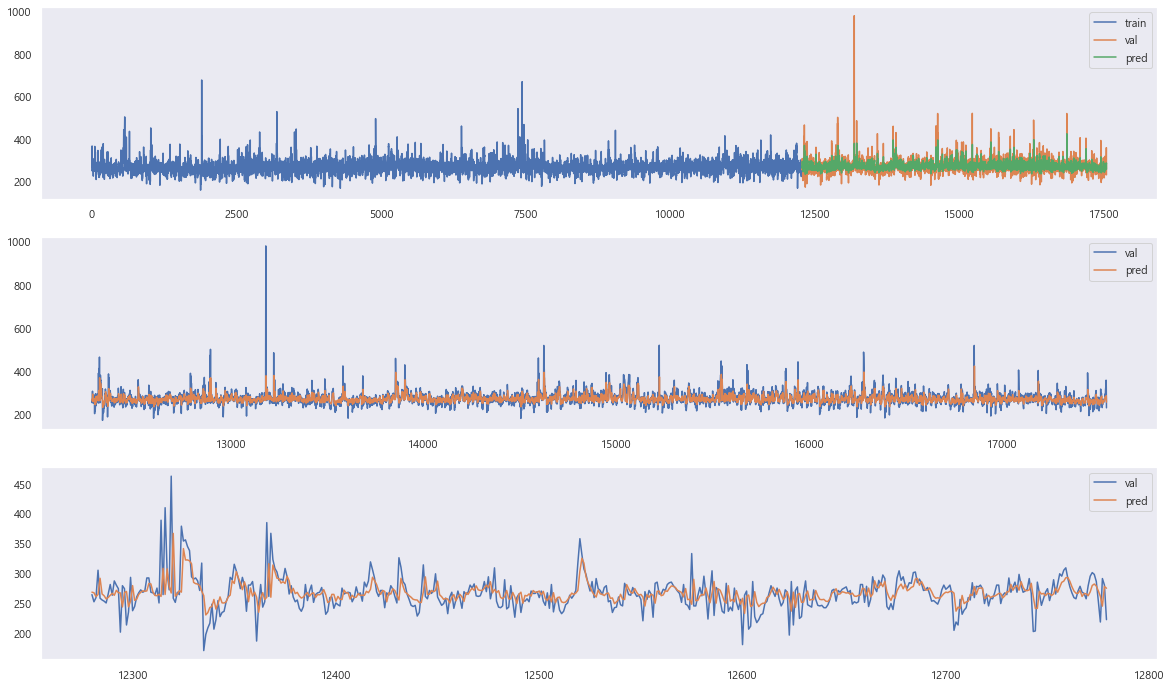

In [97]:
plot_model_result(y_train, y_val, pred_lgbm)

In [98]:
with open("model_lgbm.pkl", "wb") as file:
        pickle.dump(model_lgbm_gs, file)

In [18]:
with open("model_lgbm.pkl", "rb") as file:
        model_lgbm_gs = pickle.load(file)

6. Stacking

In [99]:
estimators = [('lr', LinearRegression()),
              ('rf', RandomForestRegressor()),
              ('xgb_gs', model_xgb_gs.best_estimator_),
              ('gb', GradientBoostingRegressor()),
              ('lgbm_gs', model_lgbm_gs.best_estimator_)]

model_stacking = StackingRegressor(estimators=estimators
                                    , final_estimator= LGBMRegressor())

In [100]:
model_stacking.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('xgb_gs',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            int...
                                            max_delta_step=0, max_depth=2,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, reg_lambda=1, ...)),
                              ('gb', GradientBoostingRegressor()),
                              ('lgbm_gs',
                               LGBMRegressor(learning_rate=0.042222222222222223,
                                             max_depth=4))],
                  final_estimator=LGBMRegressor())

In [109]:
pred_st = model_stacking.predict(x_val)

print('R2 Score', r2_score(y_val, pred_st))
print('RMSE', mean_squared_error(y_val, pred_st, squared=False))
print('MAE', mean_absolute_error(y_val, pred_st))
print('MAPE', mean_absolute_percentage_error(y_val, pred_st))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_st))

R2 Score 0.2136649035967494
RMSE 27.27561144444405
MAE 16.59791632551444
MAPE 0.059971638621079404
1-MAPE 0.9400283613789207


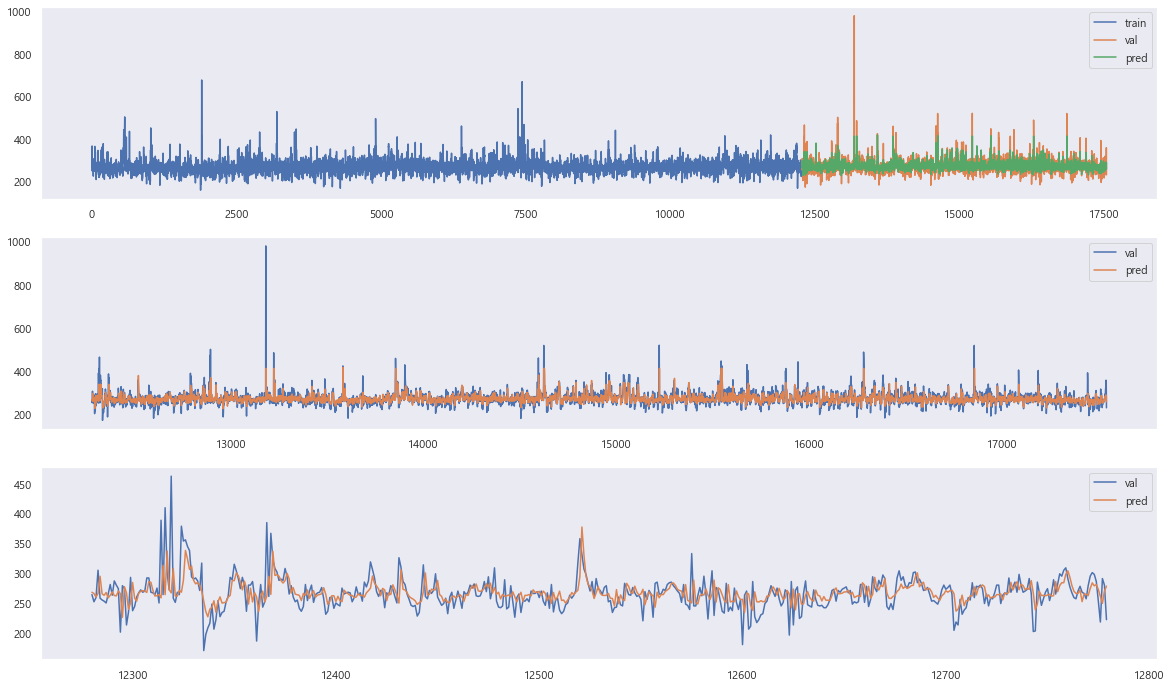

In [110]:
plot_model_result(y_train, y_val, pred_st)

In [111]:
with open("model_stacking.pkl", "wb") as file:
        pickle.dump(model_stacking, file)

In [20]:
with open("model_stacking.pkl", "rb") as file:
        model_stacking = pickle.load(file)

7. Stacking - 2

In [104]:
estimators = [('lr', LinearRegression()),
              ('rf', RandomForestRegressor()),
              ('xgb', XGBRegressor()),
              ('gb', GradientBoostingRegressor()),
              ('lgbm', LGBMRegressor())]

model_stacking2 = StackingRegressor(estimators=estimators
                                    , final_estimator= RandomForestRegressor())

In [105]:
model_stacking2.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            in...
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                              ('gb', GradientBoostingRegressor()),
                              ('lgbm', LGBMRegressor())],
                  final_estimator=LGBMRegressor())

In [106]:
pred_st2 = model_stacking2.predict(x_val)

print('R2 Score', r2_score(y_val, pred_st2))
print('RMSE', mean_squared_error(y_val, pred_st2, squared=False))
print('MAE', mean_absolute_error(y_val, pred_st2))
print('MAPE', mean_absolute_percentage_error(y_val, pred_st2))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_st2))

R2 Score 0.2160968328435955
RMSE 27.233400608293447
MAE 16.5869035112941
MAPE 0.059998475845563365
1-MAPE 0.9400015241544366


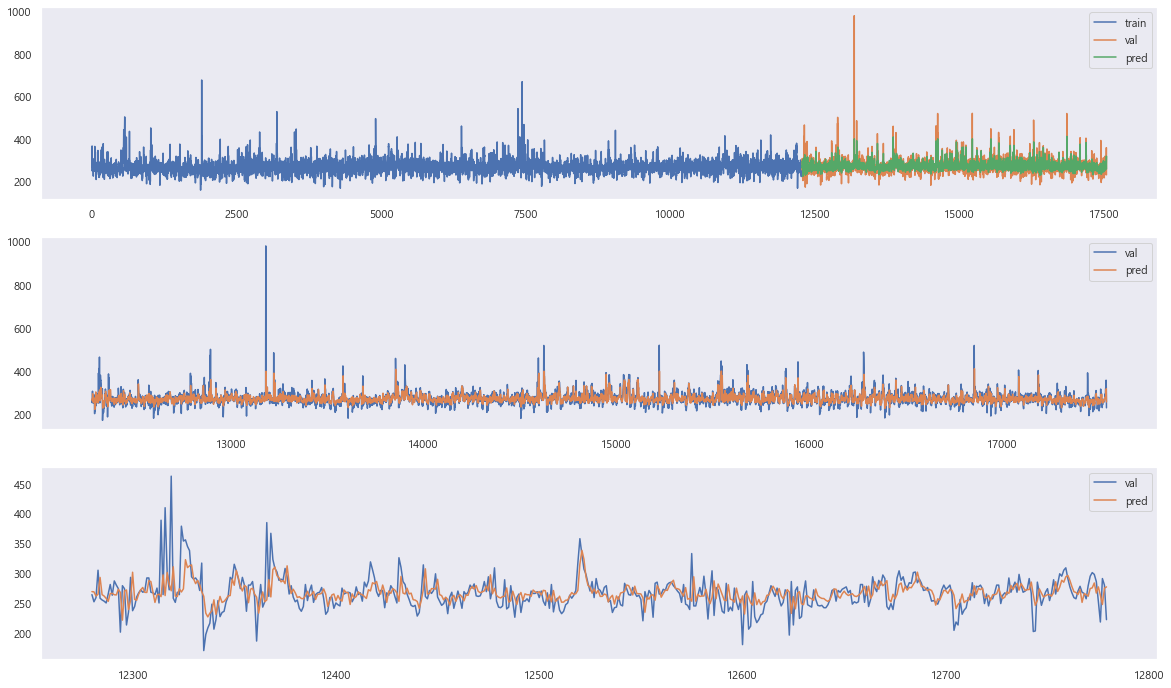

In [107]:
plot_model_result(y_train, y_val, pred_st2)

In [108]:
with open("model_stacking2.pkl", "wb") as file:
        pickle.dump(model_stacking2, file)

In [22]:
with open("model_stacking2.pkl", "rb") as file:
        model_stacking2 = pickle.load(file)

## 시계열 모델링

In [112]:
# 잔차분석 함수
def residual_diag(residuals, lags = 90) :
    print('* 정규성 검정(> 0.05) : ', round(spst.shapiro(residuals)[1],5))
    print('* 정상성 검정(< 0.05) : ', round(sm.tsa.stattools.adfuller(residuals)[1],5))
    print('* 자기상관성 확인(ACF, PACF)')
    fig,ax = plt.subplots(1,2, figsize = (20,7))
    plot_acf(residuals, lags = lags, ax = ax[0])
    plot_pacf(residuals, lags = lags, ax = ax[1])
    plt.show()

In [113]:
pd.set_option('display.max_columns', x_train.shape[0])

tmp_x_train = x_train.loc[:, ['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 습도(%)',
                              '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 습도(%)', 
                              '소요시간', 'holiday_1', 'weekend_1']]
tmp_x_val = x_val.loc[:, ['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 습도(%)',
                              '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 습도(%)', 
                              '소요시간', 'holiday_1', 'weekend_1']]

1. ARIMA

In [ ]:
# product 함수를 이용하여 값의 조합을 구성
p = [1,2,3,4,5]
q = [1,2,3,4,5]
d = [1]
iter = list(product(p,d,q))

# p, d, q
mae, aic = [],[]
for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(i[0],i[1],i[2])).fit()
    pred = model_fit.forecast(5264)
    mae.append(mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

In [37]:
result = pd.DataFrame({'params(p,d,q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(p,d,q)",mae,aic
23,"(5, 1, 4)",20.08832,112001.844444


,"params(p,d,q)",mae,aic
2,"(1, 1, 3)",20.089573,111907.391753


In [38]:
# 가장 성능이 좋은 p, d, q 값으로 모델을 생성합니다.
model_ARIMA = sm.tsa.SARIMAX(y_train, order=(1,1,3)).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


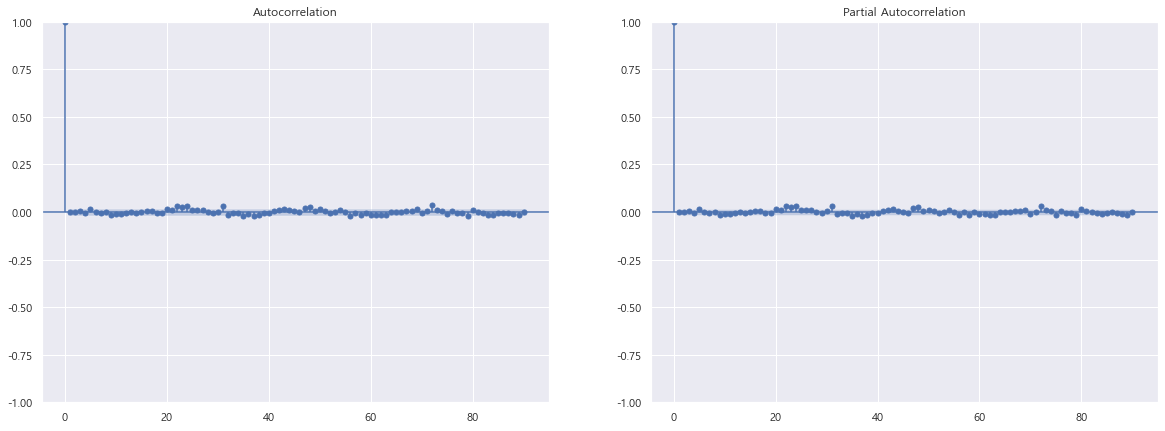

In [41]:
residuals = model_ARIMA.resid
residual_diag(residuals)

In [38]:
pred_ARIMA = model_ARIMA.forecast(5264)

print('R2 Score', r2_score(y_val, pred_ARIMA))
print('RMSE', mean_squared_error(y_val, pred_ARIMA, squared=False))
print('MAE', mean_absolute_error(y_val, pred_ARIMA))
print('MAPE', mean_absolute_percentage_error(y_val, pred_ARIMA))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_ARIMA))

R2 Score -0.005802820637366146
RMSE 30.848005503756333
MAE 20.089573011165125
MAPE 0.07244650456668011
1-MAPE 0.9275534954333199


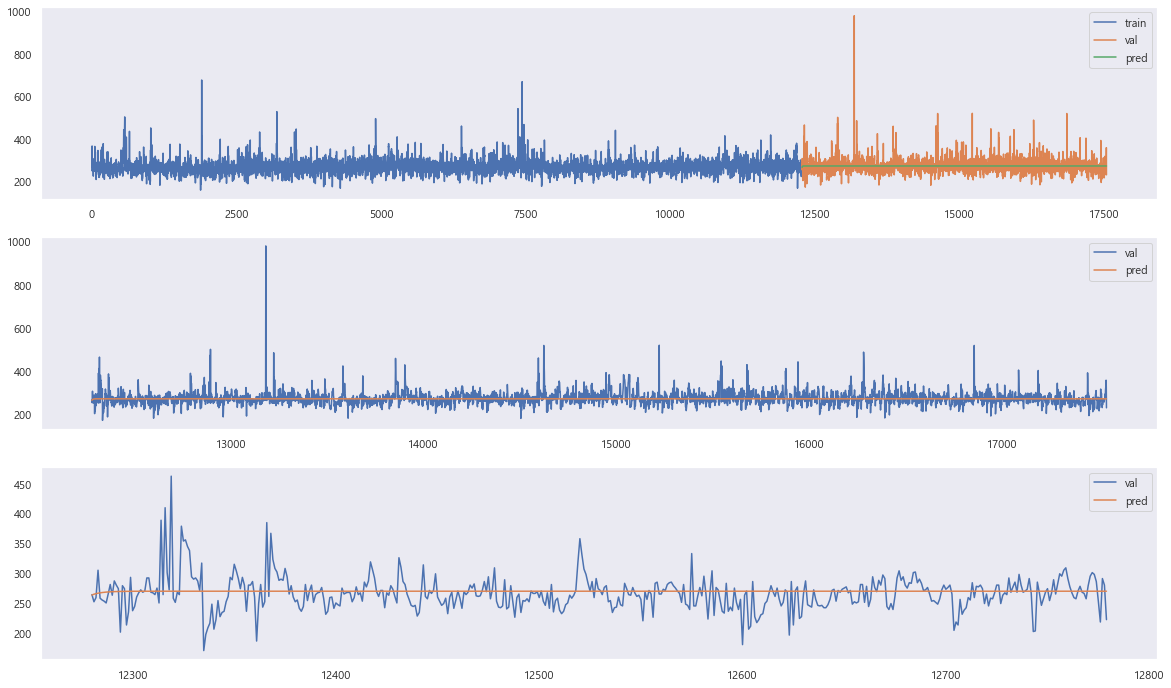

In [39]:
plot_model_result(y_train, y_val, pred_ARIMA)

In [45]:
with open("model_ARIMA.pkl", "wb") as file:
        pickle.dump(model_ARIMA, file)

In [37]:
with open("model_ARIMA.pkl", "rb") as file:
        model_ARIMA = pickle.load(file)

2. SARIMA

In [130]:
P = [1,2,3]
Q = [1,2,3]
D = [1]
mae, aic = [],[]
iter = list(product(P,D,Q))

for i in iter :
    model_fit = sm.tsa.SARIMAX(y_train, order=(1,1,3), seasonal_order=(i[0],i[1],i[2],5)).fit()
    pred = model_fit.forecast(5264)
    mae.append(mean_absolute_error(y_val, pred))
    aic.append(model_fit.aic)
    print(i)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)


In [131]:
result = pd.DataFrame({'params(P,D,Q)' : iter, 'mae' : mae, 'aic':aic})

display(result.loc[result['mae'] == result.mae.min()])
display(result.loc[result['aic'] == result.aic.min()])

,"params(P,D,Q)",mae,aic
7,"(3, 1, 2)",20.089405,111915.19355


,"params(P,D,Q)",mae,aic
2,"(1, 1, 3)",20.102129,111912.292875


In [132]:
# 가장 성능이 좋은 P, D, Q 값으로 모델을 생성합니다.
model_SARIMA = sm.tsa.SARIMAX(y_train, order=(1,1,3), seasonal_order=(1,1,3,5)).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


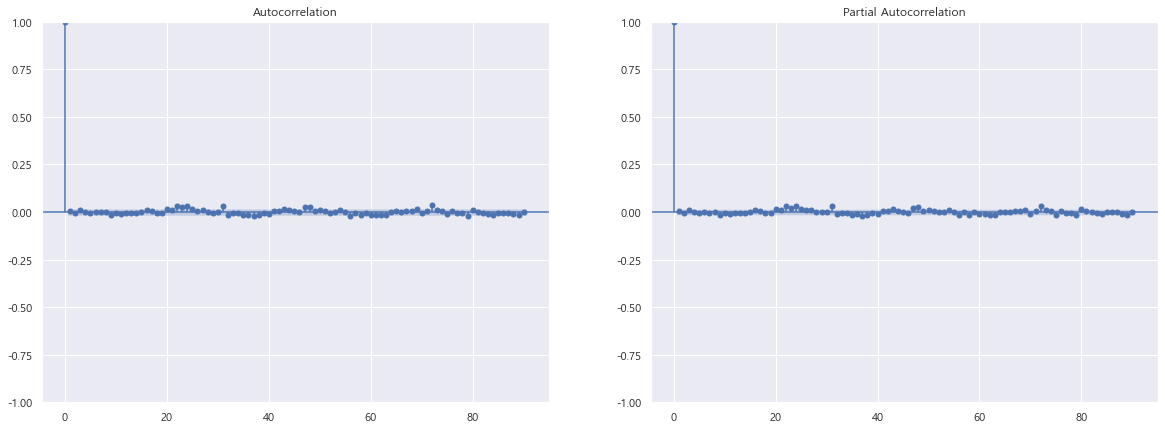

In [133]:
residuals = model_SARIMA.resid
residual_diag(residuals)

In [134]:
pred_SARIMA = model_SARIMA.forecast(5264)

print('R2 Score', r2_score(y_val, pred_SARIMA))
print('RMSE', mean_squared_error(y_val, pred_SARIMA, squared=False))
print('MAE', mean_absolute_error(y_val, pred_SARIMA))
print('MAPE', mean_absolute_percentage_error(y_val, pred_SARIMA))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_SARIMA))

R2 Score -0.0034000376765204177
RMSE 30.81113675534749
MAE 20.10212876031959
MAPE 0.07263348985005186
1-MAPE 0.9273665101499482


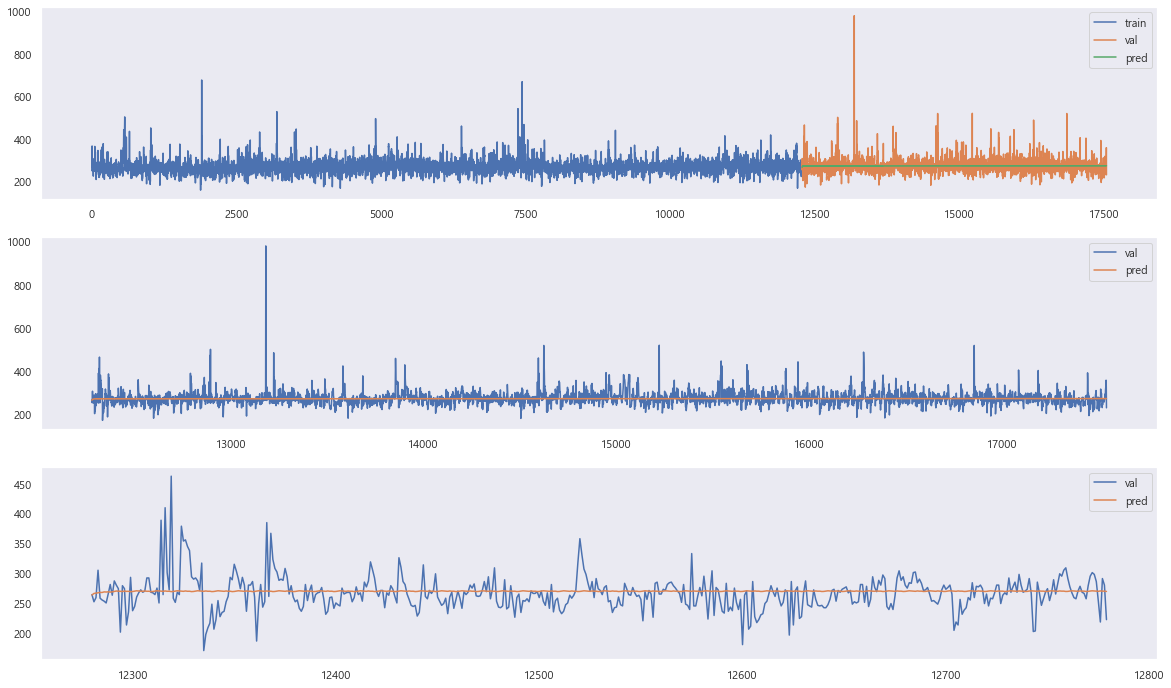

In [135]:
plot_model_result(y_train, y_val, pred_SARIMA)

In [136]:
with open("model_SARIMA.pkl", "wb") as file:
        pickle.dump(model_SARIMA, file)

In [31]:
with open("model_SARIMA.pkl", "rb") as file:
        model_SARIMA = pickle.load(file)

3. SARIMAX

In [204]:
model_SARIMAX = sm.tsa.SARIMAX(y_train, order=(1,1,3), seasonal_order=(1,1,3,5) ,exog=tmp_x_train).fit()

* 정규성 검정(> 0.05) :  0.0
* 정상성 검정(< 0.05) :  0.0
* 자기상관성 확인(ACF, PACF)


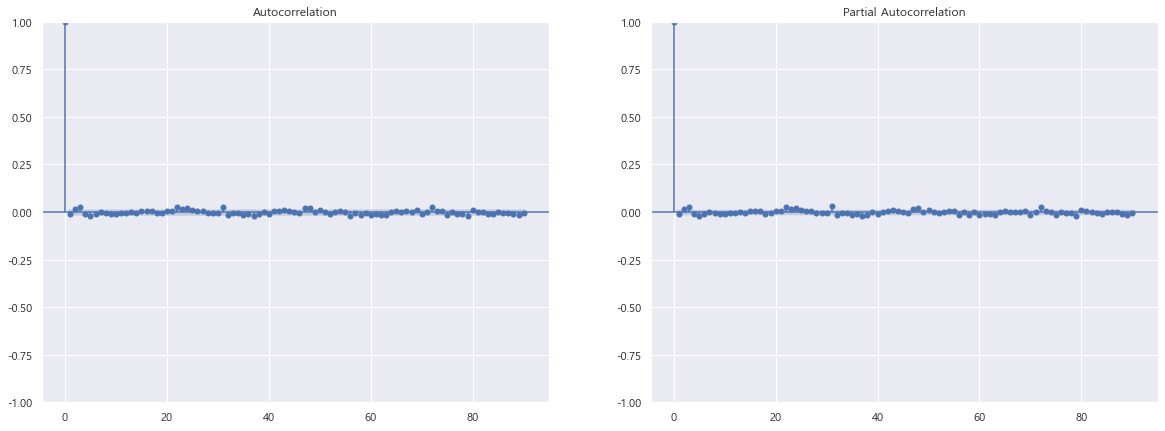

In [138]:
residuals = model_SARIMAX.resid
residual_diag(residuals)

In [139]:
y_val.mean()

271.0887158054711

In [170]:
pred_SARIMAX = model_SARIMAX.forecast(5264, exog=tmp_x_val)
arr = list((271-pred_SARIMAX)*2)

pred_SARIMAX = pred_SARIMAX+arr

print('R2 Score', r2_score(y_val, pred_SARIMAX))
print('RMSE', mean_squared_error(y_val, pred_SARIMAX, squared=False))
print('MAE', mean_absolute_error(y_val, pred_SARIMAX))
print('MAPE', mean_absolute_percentage_error(y_val, pred_SARIMAX))
print('1-MAPE', 1-mean_absolute_percentage_error(y_val, pred_SARIMAX))

R2 Score -0.37484231171686266
RMSE 36.06592787072696
MAE 24.13988677843561
MAPE 0.089893520367378
1-MAPE 0.910106479632622


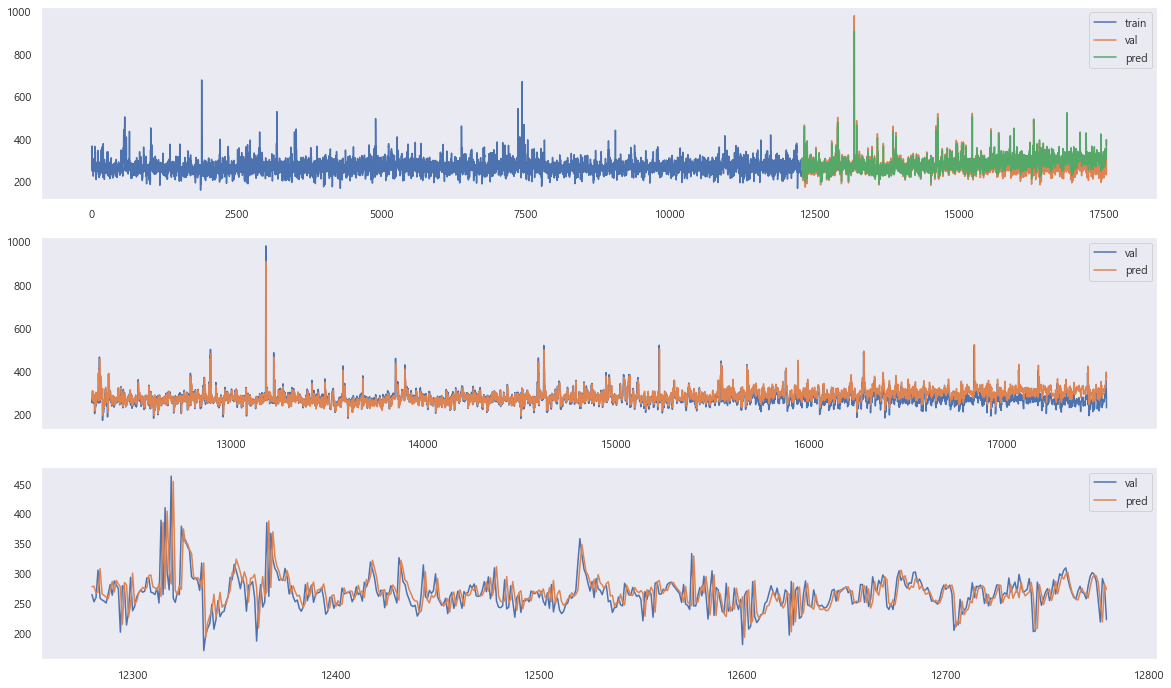

In [171]:
plot_model_result(y_train, y_val, pred_SARIMAX)

In [172]:
with open("model_SARIMAX.pkl", "wb") as file:
        pickle.dump(model_SARIMAX, file)

In [206]:
with open("model_SARIMAX.pkl", "rb") as file:
        model_SARIMAX = pickle.load(file)

## 모델링 결과

In [121]:
R2Score, RMSE, MAE, MAPE, MAPE_acc = [],[],[],[],[]
pred = [pred_lr, pred_rf, pred_xgb, pred_lgbm, pred_st, pred_st2, pred_SARIMAX]
name = ['Linear', 'Random Forest', 'XGB', 'LGBM', 'Stacking', 'Stacking_default', 'SARIMAX']
for i, p in enumerate(pred):
    R2Score.append(r2_score(y_val, p))
    RMSE.append(mean_squared_error(y_val, p, squared=False))
    MAE.append(mean_absolute_error(y_val, p))
    MAPE.append(mean_absolute_percentage_error(y_val, p))
    MAPE_acc.append(1-mean_absolute_percentage_error(y_val, p))
result = pd.DataFrame({'model':name, 'R2Score':R2Score, 'RMSE':RMSE, 'MAE':MAE, 'MAPE':MAPE, '1-MAPE':MAPE_acc})
result

,model,R2Score,RMSE,MAE,MAPE,1-MAPE
0,Linear,0.195901,27.581975,16.757433,0.060778,0.939222
1,Random Forest,0.205008,27.425336,16.890055,0.061059,0.938941
2,XGB,0.222230,27.126658,16.502922,0.059364,0.940636
3,LGBM,0.227575,27.033290,16.433901,0.059215,0.940785
4,Stacking,0.212451,27.296664,16.595945,0.059859,0.940141
5,Stacking_default,0.193903,27.616221,16.732364,0.060472,0.939528
6,SARIMAX,-6.207521,82.577862,68.973301,0.245957,0.754043


## TEST 데이터 검증

In [173]:
x_test = pd.read_csv('x_test.csv')
y_test = pd.Series(pd.read_csv('y_test.csv')['y'])

In [174]:
x_test.shape, y_test.shape

((5975, 34), (5975,))

In [175]:
pred_lr_test = model_lr.predict(x_test)
pred_rf_test = model_rf.predict(x_test)
pred_xgb_test = model_xgb_gs.predict(x_test)
pred_lgbm_test = model_lgbm_gs.predict(x_test)
pred_st_test = model_stacking.predict(x_test)
pred_st2_test = model_stacking2.predict(x_test)

In [207]:
tmp_x_test = x_test.loc[:, ['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 습도(%)',
                              '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 습도(%)', 
                              '소요시간', 'holiday_1', 'weekend_1']]
pred_SARIMAX_test = model_SARIMAX.forecast(5975, exog=tmp_x_test)
arr = list((271-pred_SARIMAX_test)*2)

pred_SARIMAX_test = pred_SARIMAX_test + arr

In [208]:
R2Score, RMSE, MAE, MAPE, MAPE_acc = [],[],[],[],[]
pred = [pred_lr_test, pred_rf_test, pred_xgb_test, pred_lgbm_test, pred_st_test, pred_st2_test, pred_SARIMAX_test]
name = ['Linear', 'Random Forest', 'XGB', 'LGBM', 'Stacking', 'Stacking_dafault', 'SARIMAX']
for i, p in enumerate(pred):
    R2Score.append(r2_score(y_test, p))
    RMSE.append(mean_squared_error(y_test, p, squared=False))
    MAE.append(mean_absolute_error(y_test, p))
    MAPE.append(mean_absolute_percentage_error(y_test, p))
    MAPE_acc.append(1-mean_absolute_percentage_error(y_test, p))
result = pd.DataFrame({'model':name, 'R2Score':R2Score, 'RMSE':RMSE, 'MAE':MAE, 'MAPE':MAPE, '1-MAPE':MAPE_acc})
result

,model,R2Score,RMSE,MAE,MAPE,1-MAPE
0,Linear,0.236421,27.275366,17.526606,0.062204,0.937796
1,Random Forest,0.261218,26.828833,16.886452,0.059793,0.940207
2,XGB,0.276328,26.553053,16.575370,0.058412,0.941588
3,LGBM,0.272139,26.629797,16.444825,0.057906,0.942094
4,Stacking,0.259589,26.858385,16.682188,0.058879,0.941121
5,Stacking_dafault,0.243990,27.139834,16.993244,0.059959,0.940041
6,SARIMAX,-0.222943,34.518087,24.911789,0.092548,0.907452


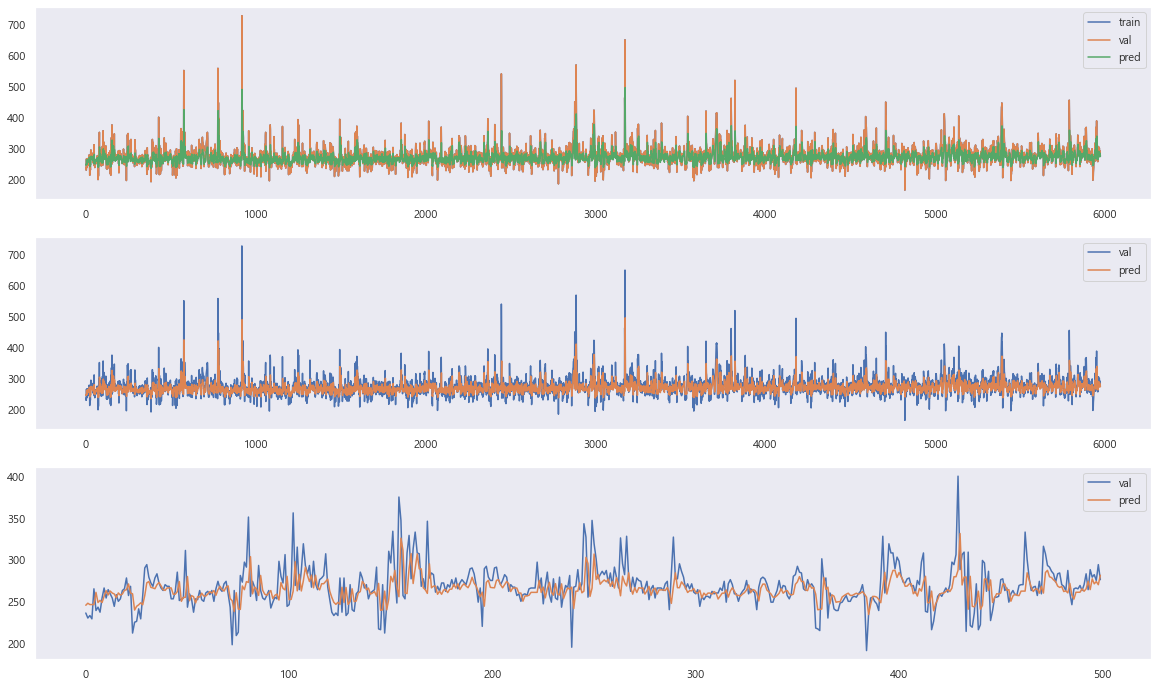

In [184]:
plot_model_result(y_test, y_test, pred_xgb_test)

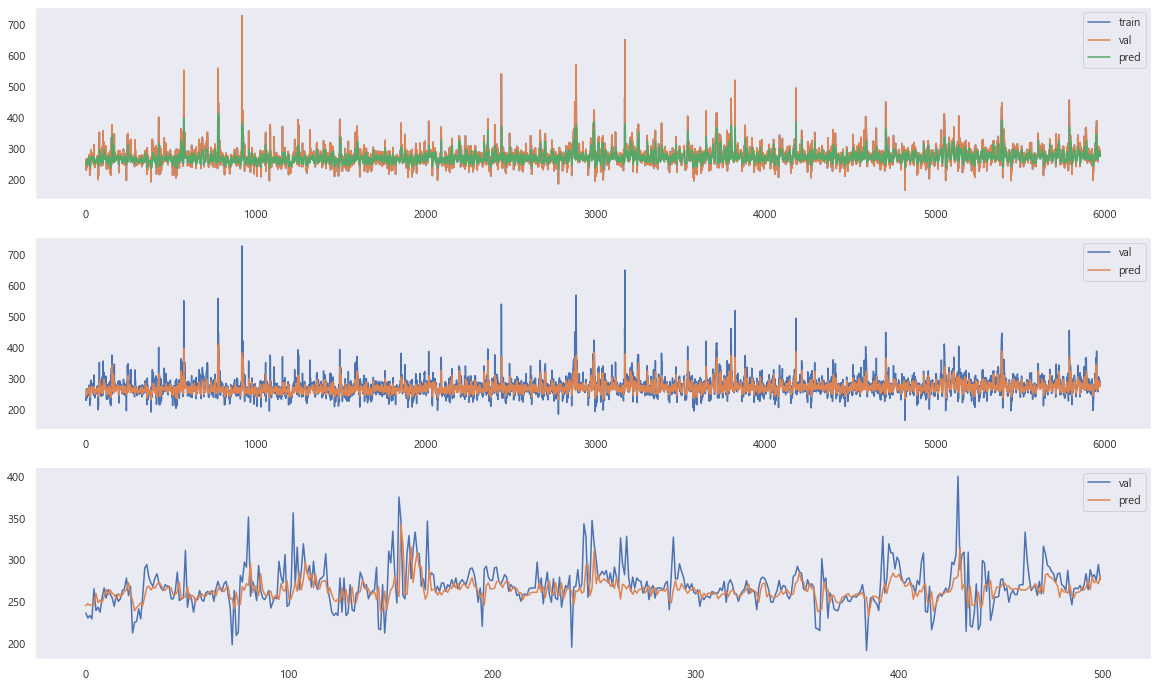

In [185]:
plot_model_result(y_test, y_test, pred_lgbm_test)

In [196]:
list(pred_SARIMAX_test), y_test

([295.84524535420053,
  303.4621179116274,
  295.39247761263937,
  296.6032250561136,
  292.492171115974,
  324.46679284226366,
  299.28418188571027,
  302.99449517940093,
  297.0484730402527,
  311.6925029896879,
  319.4002750574688,
  304.4987356209306,
  309.5039478404527,
  301.1944059657541,
  294.8434821184686,
  285.5739609206057,
  298.35267565503034,
  293.08498869362415,
  298.02998874614525,
  307.99993803178944,
  311.13099463272135,
  323.4727731812615,
  303.0674110939452,
  312.66231503728784,
  261.2909069894395,
  273.6943397415994,
  274.0499584378688,
  287.4992562801922,
  276.7792307894798,
  302.16686033534995,
  332.6706697527501,
  335.87831808676214,
  320.7979152971651,
  313.86206227007096,
  309.474221694047,
  317.92232874129456,
  319.83135902443286,
  309.5433143444284,
  303.05325758692084,
  299.9301399577188,
  306.2787689033117,
  305.34596889290674,
  305.83741220393114,
  293.41816173249333,
  294.91145906656146,
  304.2171600855422,
  325.428490635

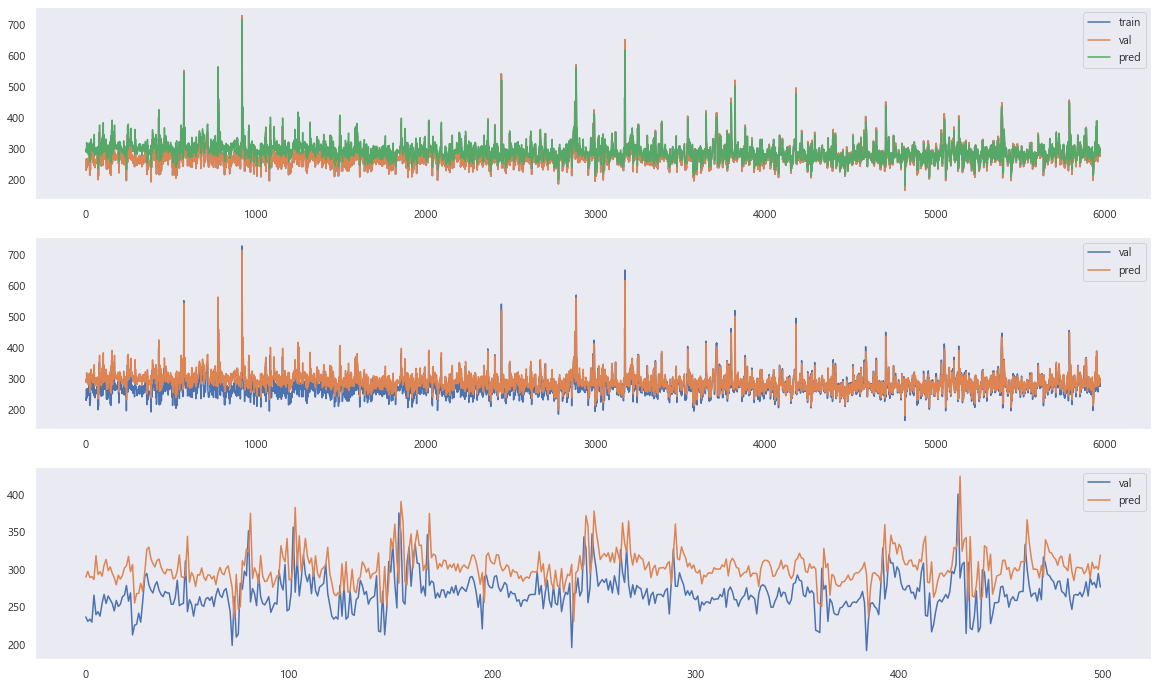

In [209]:
plot_model_result(y_test, y_test, list(pred_SARIMAX_test))

- XGB, LGBM, SARIMAX 모델이 성능이 좋았음

## 최종 테스트 파일 불러오기

In [2]:
final_data = pd.read_csv('final_data.csv')
final_data

,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
0,20.7,0.0,3.4,4.0,83.0,20.2,17.7,1003.1,1013.0,0.0,...,0.00,5000.0,22.0,312.0,1,1,2022,9,0,0
1,20.7,0.0,2.2,4.0,86.0,20.9,18.2,1003.3,1013.2,0.0,...,0.00,5000.0,21.7,0.0,1,1,2022,9,1,0
2,20.7,0.0,2.5,3.0,89.0,21.7,18.8,1003.3,1013.2,0.0,...,0.00,5000.0,21.2,0.0,1,1,2022,9,2,0
3,20.5,0.0,1.9,3.0,91.0,21.8,18.9,1003.8,1013.8,0.0,...,0.00,5000.0,20.9,0.0,1,1,2022,9,3,0
4,19.9,0.0,0.7,5.0,92.0,21.3,18.5,1004.0,1014.0,0.0,...,0.00,5000.0,20.5,0.0,1,1,2022,9,4,0
5,19.1,0.0,1.3,3.0,92.0,20.2,17.7,1004.6,1014.5,0.0,...,0.00,5000.0,20.2,0.0,1,1,2022,9,5,0
6,18.6,0.0,1.5,6.0,94.0,20.1,17.6,1005.3,1015.3,0.0,...,0.00,5000.0,20.0,0.0,1,1,2022,9,6,0
7,18.0,0.0,0.7,1.0,93.0,19.1,16.8,1006.2,1016.2,1.0,...,0.08,5000.0,20.4,0.0,1,1,2022,9,7,0
8,19.3,0.0,1.2,0.0,89.0,19.9,17.4,1006.8,1016.8,2.0,...,0.84,5000.0,22.6,0.0,1,1,2022,9,8,0
9,21.6,0.0,2.0,0.0,81.0,20.8,18.1,1007.2,1017.1,2.0,...,1.63,5000.0,25.6,0.0,1,1,2022,9,9,0


## 최종 검증

- XGB, LGBM, SARIMAX 모델 사용

In [3]:
with open("model_xgb.pkl", "rb") as file:
        model_xgb_gs = pickle.load(file)
        
        
with open("model_lgbm.pkl", "rb") as file:
        model_lgbm_gs = pickle.load(file)
        
        
with open("model_SARIMAX.pkl", "rb") as file:
        model_SARIMAX = pickle.load(file)

### 최종 : SARIMAX 모델로 선택하여 검증 진행

In [4]:
pred = 312
for index, row in final_data.iterrows():
    row = final_data.iloc[[index]]
    row['소요시간'] = pred
    print(row['소요시간'])
    row_tmp = row.loc[:, ['서울 기온(°C)', '서울 강수량(mm)', '서울 풍속(m/s)', '서울 습도(%)',
                              '부산 기온(°C)', '부산 강수량(mm)', '부산 풍속(m/s)', '부산 습도(%)', 
                              '소요시간', 'holiday_1', 'weekend_1']]
    display(row)

    pred_SARIMAX = model_SARIMAX.forecast(1, exog=row_tmp)
    pred_SARIMAX = pred_SARIMAX+(271-pred_SARIMAX)*2
    
    pred = list(pred_SARIMAX)
    pred = int(np.round(pred))
    print(pred)

0    312
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
0,20.7,0.0,3.4,4.0,83.0,20.2,17.7,1003.1,1013.0,0.0,...,0.0,5000.0,22.0,312,1,1,2022,9,0,0


322
1    322
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
1,20.7,0.0,2.2,4.0,86.0,20.9,18.2,1003.3,1013.2,0.0,...,0.0,5000.0,21.7,322,1,1,2022,9,1,0


331
2    331
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
2,20.7,0.0,2.5,3.0,89.0,21.7,18.8,1003.3,1013.2,0.0,...,0.0,5000.0,21.2,331,1,1,2022,9,2,0


339
3    339
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
3,20.5,0.0,1.9,3.0,91.0,21.8,18.9,1003.8,1013.8,0.0,...,0.0,5000.0,20.9,339,1,1,2022,9,3,0


347
4    347
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
4,19.9,0.0,0.7,5.0,92.0,21.3,18.5,1004.0,1014.0,0.0,...,0.0,5000.0,20.5,347,1,1,2022,9,4,0


355
5    355
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
5,19.1,0.0,1.3,3.0,92.0,20.2,17.7,1004.6,1014.5,0.0,...,0.0,5000.0,20.2,355,1,1,2022,9,5,0


363
6    363
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
6,18.6,0.0,1.5,6.0,94.0,20.1,17.6,1005.3,1015.3,0.0,...,0.0,5000.0,20.0,363,1,1,2022,9,6,0


371
7    371
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
7,18.0,0.0,0.7,1.0,93.0,19.1,16.8,1006.2,1016.2,1.0,...,0.08,5000.0,20.4,371,1,1,2022,9,7,0


379
8    379
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
8,19.3,0.0,1.2,0.0,89.0,19.9,17.4,1006.8,1016.8,2.0,...,0.84,5000.0,22.6,379,1,1,2022,9,8,0


386
9    386
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
9,21.6,0.0,2.0,0.0,81.0,20.8,18.1,1007.2,1017.1,2.0,...,1.63,5000.0,25.6,386,1,1,2022,9,9,0


390
10    390
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
10,23.6,0.0,1.3,2.0,66.0,19.1,16.8,1007.5,1017.3,2.0,...,2.32,5000.0,27.5,390,1,1,2022,9,10,0


390
11    390
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
11,24.5,0.0,2.2,5.0,48.0,14.7,12.7,1007.6,1017.4,2.0,...,2.87,5000.0,34.1,390,1,1,2022,9,11,0


388
12    388
Name: 소요시간, dtype: int64


,서울 기온(°C),서울 강수량(mm),서울 풍속(m/s),서울 풍향(16방위),서울 습도(%),서울 증기압(hPa),서울 이슬점온도(°C),서울 현지기압(hPa),서울 해면기압(hPa),서울 일조(hr),...,부산 일사(MJ/m2),부산 시정(10m),부산 지면온도(°C),소요시간,holiday_1,Korean_holiday_1,year,month,time,weekend_1
12,25.9,0.0,2.5,3.0,36.0,11.9,9.6,1007.4,1017.2,2.0,...,3.21,5000.0,36.7,388,1,1,2022,9,12,0


385


---

### ⭐⭐최종 결론⭐⭐

2022년 9월 9일 12시 교통 소요시간 = 385분 = 6시간 25분

---